In [1]:
#!/usr/bin/python

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# import os
# import sys
import numpy as np

import time

from reservoir import Reservoir
import data

%load_ext autoreload
%autoreload 1
%aimport data
%aimport reservoir

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
b = Reservoir(n_res=800, input_scale=2, train_method='ridge', train_param=5,
              weights_type='complex gaussian', random_projection='simulation',
              activation_fun='binary', activation_param=1, encoding_method='naivebinary', 
              encoding_param=0.55, input_dim=4096, forget=100)

In [3]:
roll_num = 500
input_data = data.mackey_glass(sequence_length=2000)
y = data.roll_and_concat(input_data, roll_num=roll_num)
b.fit(input_data, y)

Start of training...
Initialization finished. Elapsed time:
0.4626741409301758
100%|██████████| 2000/2000 [00:05<00:00, 354.24it/s]
(1, 1900, 4896)
Iterations finished. Elapsed time:
6.115199565887451
Training finished. Elapsed time:
6.790967226028442
Training score:
0.732197587901847


Reservoir(activation_fun='binary', activation_param=1,
     encoding_method='naivebinary', encoding_param=0.55, forget=100,
     input_dim=4096, input_scale=2, n_res=800, opu_transform=None,
     random_projection='simulation',
     random_state=<mtrand.RandomState object at 0x7f224f115948>,
     res_scale=1, save=0, train_method='ridge', train_param=5, verbose=1,
     weights_type='complex gaussian')

In [4]:
input_data = data.mackey_glass(sequence_length=2000)
y = data.roll_and_concat(input_data, roll_num=roll_num)[:, b.forget:, :]
pred_output, valid_score = b.score(input_data, y)

Start of testing...
Initialization finished. Elapsed time:
0.10935115814208984
100%|██████████| 2000/2000 [00:05<00:00, 357.33it/s]
(1, 1900, 4896)
Iterations finished. Elapsed time:
5.710369348526001
Testing finished. Elapsed time:
6.0429933071136475
Testing finished. Elapsed time:
6.790967226028442
Testing score:
-0.12546606757338452


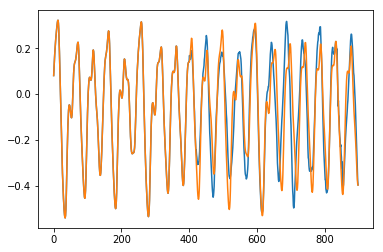

In [12]:
n_input = round(pred_output.shape[0]/2)-550
all_data = np.concatenate((y[0, 0:n_input, 0], pred_output[n_input, :]))
plt.plot(all_data)
plt.plot(y[0, 0:n_input+roll_num, 0])
plt.show()

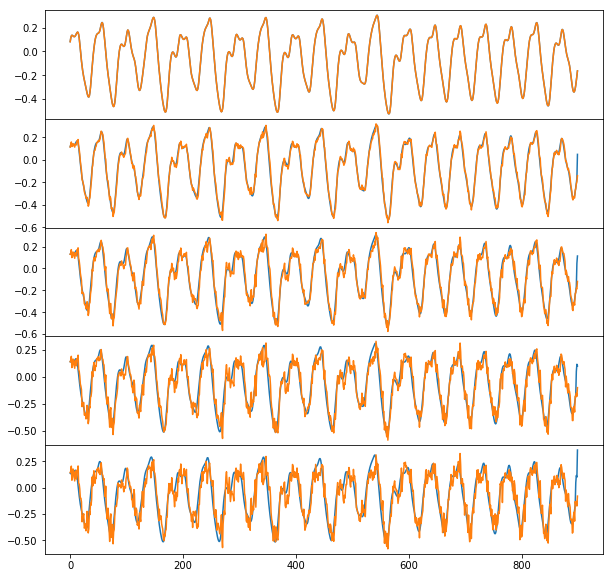

In [8]:
fig, axs = plt.subplots(y.shape[-1], 1, sharex=True, figsize=(10,10))
fig.subplots_adjust(hspace=0)
for i in range(y.shape[-1]):
    axs[i].plot(y[0,:,i])
    axs[i].plot(pred_output[:,i])
plt.show()